# Importation des packages et récupération des données via l’API

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

r = requests.get("https://public.opendatasoft.com/api/records/1.0/search/?dataset=buildingref-france-arcep-mobile-site-2g3g4g&q=&rows=-1&facet=op_name&facet=technology&facet=com_code&facet=com_name&facet=epci_name&facet=epci_code&facet=dep_name&facet=dep_code&facet=reg_name&facet=reg_code")
a_json = r.json()['records']

# Récupération des donnés dans dataframe et suppression des doublants au niveau des communes

In [21]:
dataframe = pd.DataFrame.from_dict(a_json)
fields = []
for i in range(len(dataframe['fields'])):
    fields.append(dataframe['fields'][i])
dataframe = pd.DataFrame.from_dict(fields).drop_duplicates(subset =['com_code'])

# site issu du programme France mobile (Niveau commune)

In [44]:
dataframe_o = dataframe.query('site_import.str.contains("oui", na=False)', engine='python')
nombre_de_ligne_o = dataframe_o["site_import"].count()
#nombre_de_ligne_o_2 : est une variable pour le deuxième camembert chart
nombre_de_ligne_o_2 = nombre_de_ligne_o

# site non issu du programme France mobile (Niveau commune)

In [45]:
dataframe_n = dataframe.query('site_import.str.contains("non", na=False)', engine='python')
nombre_de_ligne_n = dataframe_n["site_import"].count()

# Calcule du nombre des site issu et non issu du programme France mobile pour éviter les valeurs « NaN » 

In [46]:
nombre_de_ligne_o_n = nombre_de_ligne_o + nombre_de_ligne_n

# calcule du nombre des communes équipés par la 4G dans les communes issu du programme France mobile

In [47]:
dataframe_4g_dans_o =  dataframe_o.query('technology.str.contains("4G")', engine='python')
nombre_de_ligne_4g_dans_o = dataframe_4g_dans_o["site_import"].count()

# Affichage du pourcentage des communes issus du programme France mobile par rapport à toutes les communes

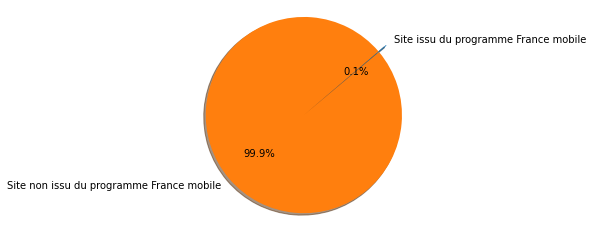

In [59]:
labels = 'Site issu du programme France mobile', 'Site non issu du programme France mobile'
sizes = [nombre_de_ligne_o, nombre_de_ligne_n]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=40)
ax1.axis('equal') 
plt.show()









# Affichage du pourcentage des communes équipés par la 4G dans la liste des communes issus du programme France mobile

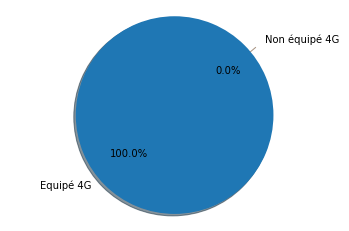

In [69]:
labels = 'Equipé 4G', 'Non équipé 4G'
sizes = [nombre_de_ligne_4g_dans_o, nombre_de_ligne_o_2 - nombre_de_ligne_4g_dans_o]
explode = (0, 0.1) 
fig1, ax1 = plt2.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=40)
ax1.axis('equal') 
plt2.show()
